# LOGISTIC REGRESSION

In [1]:
## Import the initial necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the Titanic_train dataset

In [4]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\07 Logistic Regression\Titanic_train.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
## Task is to build a logistic regression model
## In the given dataset, Survived is our target column while the remaining columns are features

In [7]:
## We check the basic information of the dataset

In [8]:
data.shape  ## There are 1309 rows and 12 columns

(891, 12)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
## Here we see that Name, Sex, Ticket, Cabin and Embarked are categorical columns while remaining are numerical

In [11]:
## Since Name and Passenger ID does not hold any relation with the target column hence we can drop these

In [12]:
data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [13]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [14]:
## EDA Step 1 - check and treat null values

In [15]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
## We have null values in Age, Cabin and Embarked columns. Since this a comparatively small dataset we will replace
## null values with median and mode respectively instead of dropping so as to avoid loss of data

In [17]:
median1=data['Age'].median()
median1

28.0

In [18]:
data['Age']=data['Age'].fillna(median1)

In [19]:
mode=data['Cabin'].mode()
mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [20]:
data['Cabin']=data['Cabin'].fillna(mode[1])  ## we fill second mode

In [21]:
mode1=data['Embarked'].mode()
mode1

0    S
Name: Embarked, dtype: object

In [22]:
data['Embarked']=data['Embarked'].fillna(mode[0])  ## we fill mode

In [23]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [24]:
## Now there are no null values in our dataset

In [25]:
## EDA Step 2 - check and treat duplicate rows

In [26]:
data.duplicated().any()  ## there are duplicate rows

True

In [27]:
data[data.duplicated()]  ## to check the exact duplicate row

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,0,3,male,28.00,8,2,CA. 2343,69.5500,C23 C25 C27,S
324,0,3,male,28.00,8,2,CA. 2343,69.5500,C23 C25 C27,S
409,0,3,female,28.00,3,1,4133,25.4667,C23 C25 C27,S
413,0,2,male,28.00,0,0,239853,0.0000,C23 C25 C27,S
466,0,2,male,28.00,0,0,239853,0.0000,C23 C25 C27,S
485,0,3,female,28.00,3,1,4133,25.4667,C23 C25 C27,S
612,1,3,female,28.00,1,0,367230,15.5000,C23 C25 C27,Q
641,1,1,female,24.00,0,0,PC 17477,69.3000,B35,C
644,1,3,female,0.75,2,1,2666,19.2583,C23 C25 C27,C
692,1,3,male,28.00,0,0,1601,56.4958,C23 C25 C27,S


In [28]:
data.drop_duplicates(inplace=True)  ## this will permanently delete the duplicate rows

In [29]:
data.duplicated().any()  ## to cross check if the duplicates are removed

False

In [30]:
## EDA Step 3 - check and treat outliers

In [31]:
## first we define numerical colums
num_col=[i for i in data.columns if data[i].dtypes!='O']
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

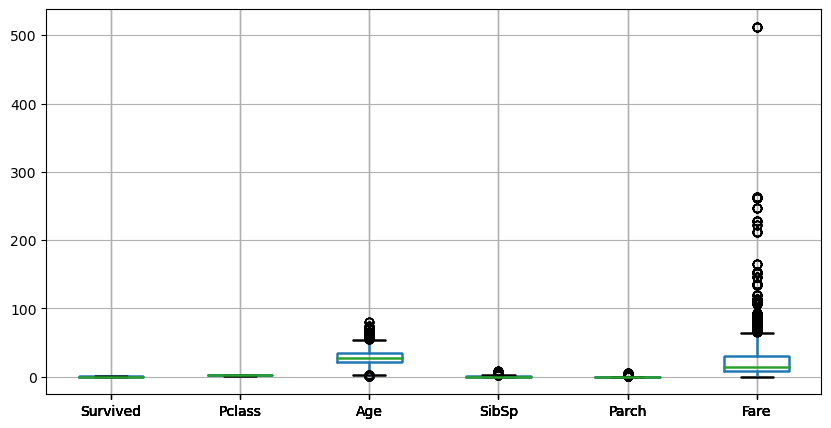

In [32]:
## we can draw boxplot to check for the outliers
for i in num_col:
    data.boxplot(column=num_col,figsize=(10,5))
plt.show()

In [33]:
## Boxplot shows presence of outliers in multiple columns

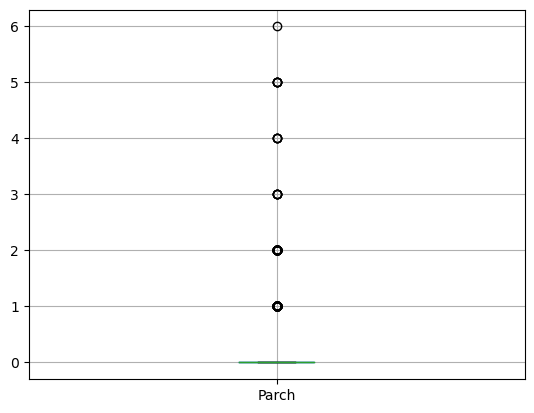

In [34]:
data.boxplot('Parch')
plt.show()

In [35]:
## checking boxplot one by one shows maximum outliers in Age and Fare columns however given this is a detail of paggenger
## in a ship, their extreme age and ticket fare may not be an outlier in the data. Hence we decide not to remove outliers.

In [36]:
## EDA Step 4 - correlation check using heatmap

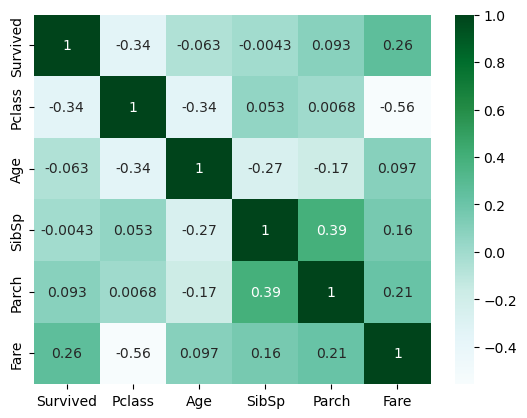

In [37]:
sns.heatmap(data[num_col].corr(),annot=True,cmap='BuGn')
plt.show()

In [38]:
## There doesn't seem to be much correlation between features and target

In [39]:
import warnings
warnings.filterwarnings('ignore')

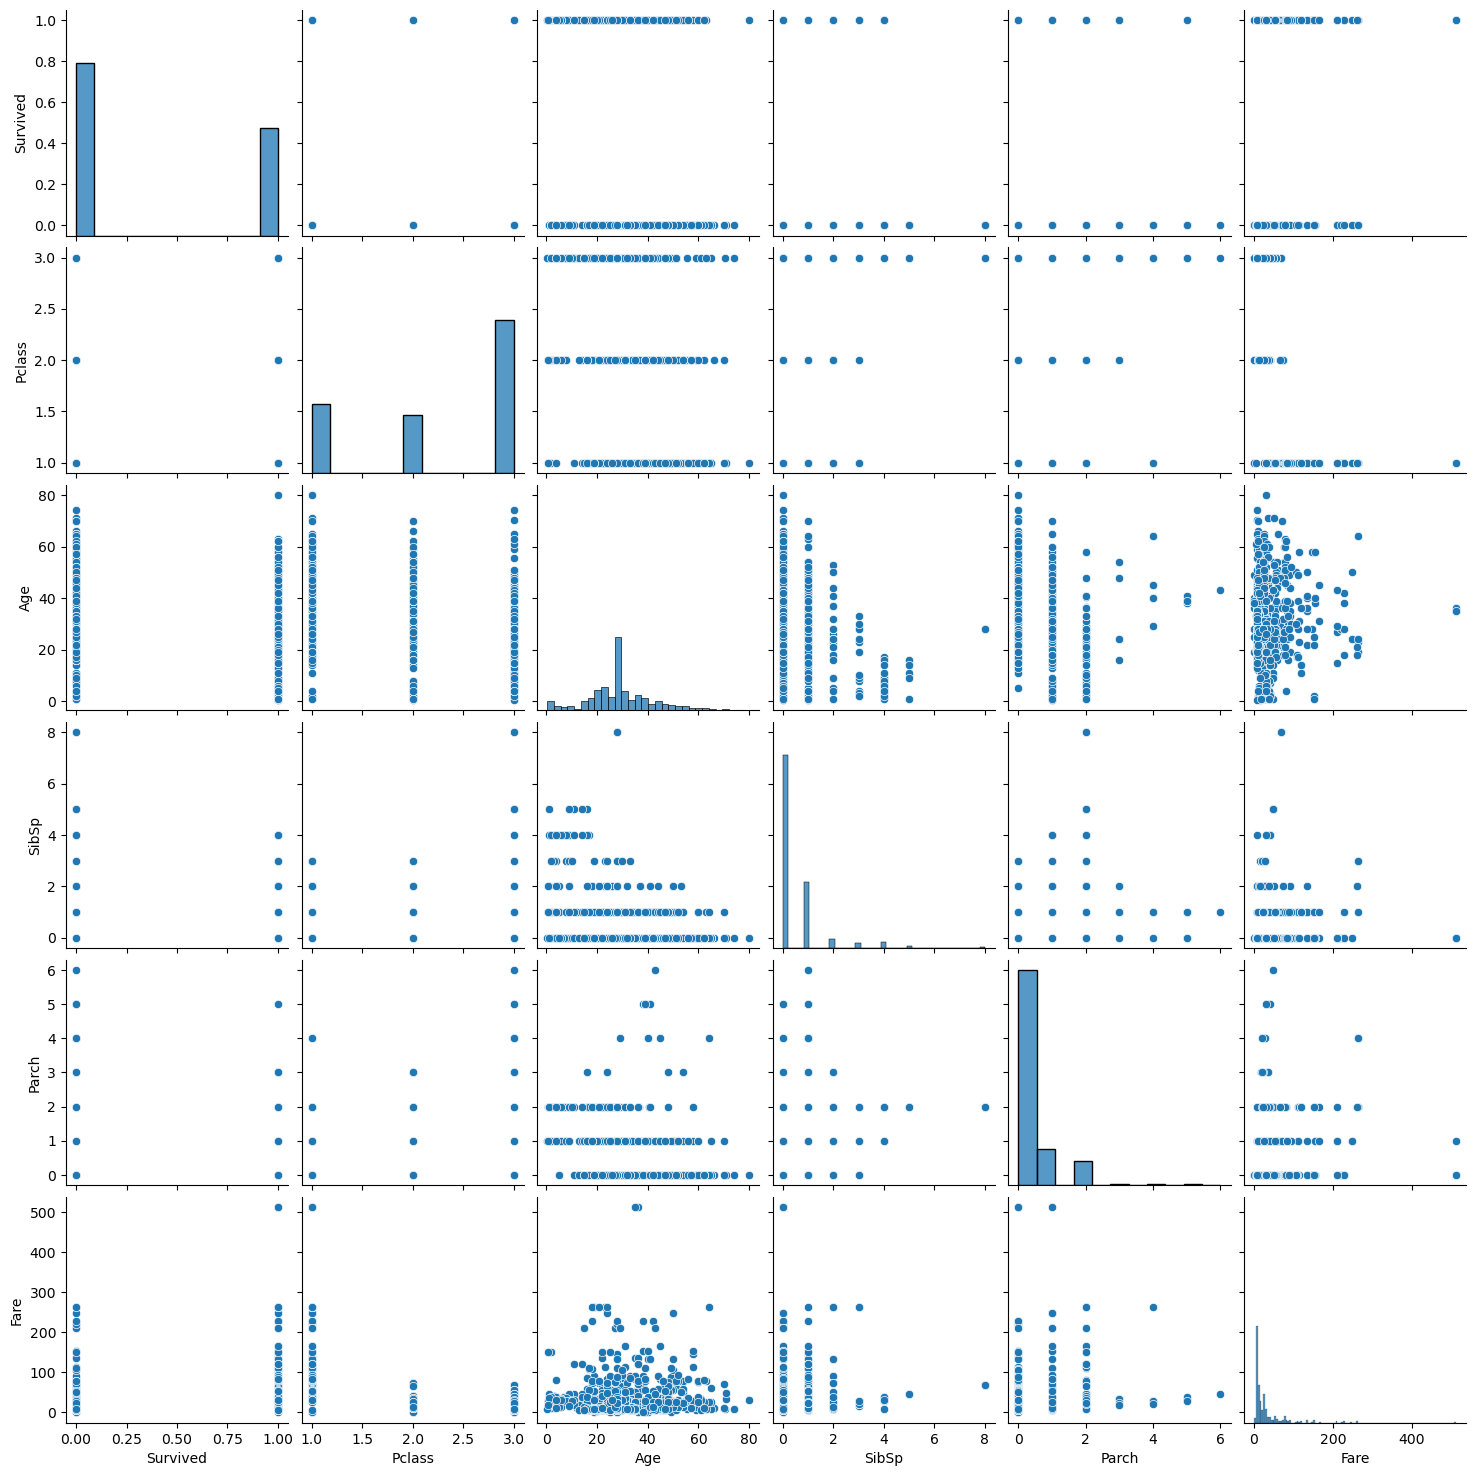

In [40]:
sns.pairplot(data[num_col])
plt.show()

In [41]:
## EDA Step 5 - Feature Engineering (converting categorical columns to numerical and standard scaling)

In [42]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [43]:
cat_col=[i for i in data.columns if data[i].dtypes=='O']
cat_col

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [44]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [45]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [46]:
data['Cabin'].unique()

array(['C23 C25 C27', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [47]:
data['Embarked'].unique()

array(['S', 'C', 'Q', 'B96 B98'], dtype=object)

In [48]:
ord_enc=OrdinalEncoder()

In [49]:
data['Ticket']=ord_enc.fit_transform(data[['Ticket']])  ## coverting Ticket column to numerical

In [50]:
data['Cabin']=ord_enc.fit_transform(data[['Cabin']])  ## coverting Cabin column to numerical

In [51]:
data['Embarked']=ord_enc.fit_transform(data[['Embarked']])  ## coverting Embarked column to numerical

In [52]:
data[cat_col]

,Sex,Ticket,Cabin,Embarked
0,male,523.0,63.0,3.0
1,female,596.0,81.0,1.0
2,female,669.0,63.0,3.0
3,female,49.0,55.0,3.0
4,male,472.0,63.0,3.0
...,...,...,...,...
886,male,101.0,63.0,3.0
887,female,14.0,30.0,3.0
888,female,675.0,63.0,3.0
889,male,8.0,60.0,1.0


In [53]:
data_new=pd.get_dummies(data,dtype='int')  ## coverting Sex column to numerical

In [54]:
data_new

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,523.0,7.2500,63.0,3.0,0,1
1,1,1,38.0,1,0,596.0,71.2833,81.0,1.0,1,0
2,1,3,26.0,0,0,669.0,7.9250,63.0,3.0,1,0
3,1,1,35.0,1,0,49.0,53.1000,55.0,3.0,1,0
4,0,3,35.0,0,0,472.0,8.0500,63.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,101.0,13.0000,63.0,3.0,0,1
887,1,1,19.0,0,0,14.0,30.0000,30.0,3.0,1,0
888,0,3,28.0,1,2,675.0,23.4500,63.0,3.0,1,0
889,1,1,26.0,0,0,8.0,30.0000,60.0,1.0,0,1


In [55]:
## Now we apply standard scaler to all the columns, before that we need to split features and target

In [56]:
target=data_new[['Survived']]
features=data_new.drop('Survived',axis=1)

In [57]:
std_sca=StandardScaler()

In [58]:
features=std_sca.fit_transform(features)
features

array([[ 0.83498946, -0.56655874,  0.55410137, ...,  0.58856783,
        -0.73518226,  0.73518226],
       [-1.5526438 ,  0.65552278,  0.55410137, ..., -1.91141687,
         1.36020692, -1.36020692],
       [ 0.83498946, -0.26103836, -0.5021921 , ...,  0.58856783,
         1.36020692, -1.36020692],
       ...,
       [ 0.83498946, -0.10827817,  0.55410137, ...,  0.58856783,
         1.36020692, -1.36020692],
       [-1.5526438 , -0.26103836, -0.5021921 , ..., -1.91141687,
        -0.73518226,  0.73518226],
       [ 0.83498946,  0.19724221, -0.5021921 , ..., -0.66142452,
        -0.73518226,  0.73518226]])

In [59]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Model building

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
## defining logistic regression model
model=LogisticRegression()

In [62]:
## training the model
model.fit(features,target)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score  ## to evaluate performance of the model

In [64]:
pred=model.predict(features)  ## predicting target values based on model

In [65]:
accuracy_score(target,pred)

0.8057142857142857

In [66]:
## training validation score is 80.57 percent

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
confusion_matrix(target,pred)

array([[461,  78],
       [ 92, 244]], dtype=int64)

In [69]:
print(classification_report(target,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       539
           1       0.76      0.73      0.74       336

    accuracy                           0.81       875
   macro avg       0.80      0.79      0.79       875
weighted avg       0.80      0.81      0.80       875



In [70]:
model.coef_

array([[-0.84594219, -0.49147829, -0.2764818 , -0.08539269, -0.14688087,
         0.12989909,  0.1742099 , -0.18564139,  0.65365223, -0.65365223]])

In [71]:
model.intercept_

array([-0.64929841])

In [72]:
from sklearn.metrics import roc_auc_score,roc_curve

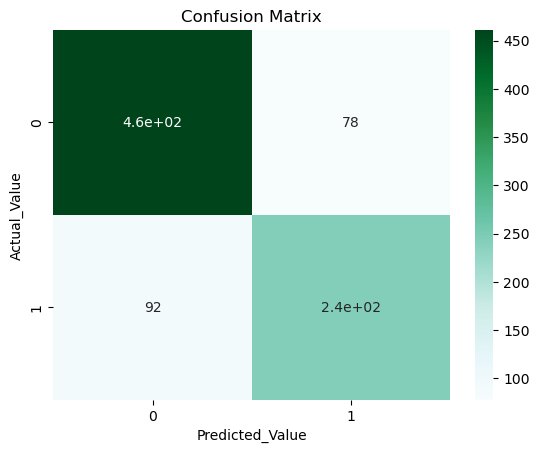

In [73]:
sns.heatmap(confusion_matrix(target,pred),annot=True,cmap='BuGn')
plt.xlabel('Predicted_Value')
plt.ylabel('Actual_Value')
plt.title('Confusion Matrix')
plt.show();

In [74]:
## Now we will try to perform manual calculations for precision, recall and F1 score

In [75]:
confusion_matrix(target,pred)

array([[461,  78],
       [ 92, 244]], dtype=int64)

In [76]:
target.value_counts()

Survived
0           539
1           336
Name: count, dtype: int64

In [77]:
## precision = True Positive / (True Positive + False Positive)
precision_0= 461/(461+92)
precision_0

0.833634719710669

In [78]:
precision_1= 244/(78+244)
precision_1

0.7577639751552795

In [79]:
## recall = True Positive / (True Positive + False Negative)
recall_0= 461/(461+78)
recall_0

0.8552875695732839

In [80]:
recall_1= 244/(92+244)
recall_1

0.7261904761904762

In [81]:
## f1-score = 2*precision*recall / (precision + recall)
f1_score_0= 2*(precision_0*recall_0)/(precision_0+recall_0)
f1_score_0

0.8443223443223442

In [82]:
f1_score_1= 2*(precision_1*recall_1)/(precision_1+recall_1)
f1_score_1

0.7416413373860182

In [83]:
## All our manual calculations are justified in the classification report

In [84]:
## For ROC curve we need to find prected probability of the features

In [85]:
pred_prob=model.predict_proba(features)[:,1]
pred_prob

array([0.07682474, 0.91670883, 0.57193335, 0.89887945, 0.06643248,
       0.11892257, 0.40321801, 0.09141965, 0.57090686, 0.91474497,
       0.81125032, 0.81799159, 0.1066071 , 0.03060949, 0.71656884,
       0.64791351, 0.08334524, 0.24560192, 0.52639775, 0.73732759,
       0.20711576, 0.278797  , 0.77229845, 0.40412553, 0.55419964,
       0.33731449, 0.15400539, 0.45693756, 0.67464608, 0.09113141,
       0.40425684, 0.93372085, 0.67376802, 0.05485415, 0.47770214,
       0.32094637, 0.15182506, 0.10451483, 0.57466742, 0.78152989,
       0.40006741, 0.81079155, 0.13504904, 0.90336794, 0.74418962,
       0.07682842, 0.08215972, 0.70693212, 0.09465329, 0.63123568,
       0.06780794, 0.10390726, 0.89770579, 0.77848659, 0.22124361,
       0.51355055, 0.82885279, 0.14821783, 0.84729613, 0.03283229,
       0.18370248, 0.94588771, 0.28038796, 0.08182664, 0.51512381,
       0.11021538, 0.87361219, 0.1040978 , 0.39048428, 0.06067987,
       0.17133595, 0.30336106, 0.25992648, 0.12786068, 0.10743

In [86]:
auc_score=roc_auc_score(target,pred_prob)
auc_score

0.8622973540065377

In [87]:
## Area under the ROC curve is 86 percent which is greated than 50 percent. This means the model is acceptable.

In [88]:
roc_curve(target,pred_prob)

(array([0.        , 0.        , 0.        , 0.00185529, 0.00185529,
        0.00371058, 0.00371058, 0.00742115, 0.00742115, 0.00927644,
        0.00927644, 0.01113173, 0.01113173, 0.01298701, 0.01298701,
        0.0148423 , 0.0148423 , 0.01855288, 0.01855288, 0.02040816,
        0.02040816, 0.02226345, 0.02226345, 0.02597403, 0.02597403,
        0.0296846 , 0.0296846 , 0.03153989, 0.03153989, 0.03525046,
        0.03525046, 0.03710575, 0.03710575, 0.03896104, 0.03896104,
        0.04267161, 0.04267161, 0.04638219, 0.04638219, 0.04823748,
        0.04823748, 0.05009276, 0.05009276, 0.06122449, 0.06122449,
        0.06307978, 0.06307978, 0.06493506, 0.06493506, 0.06864564,
        0.06864564, 0.07050093, 0.07050093, 0.07235622, 0.07235622,
        0.07792208, 0.07792208, 0.08348794, 0.08348794, 0.09090909,
        0.09090909, 0.09276438, 0.09276438, 0.09647495, 0.09647495,
        0.10018553, 0.10018553, 0.1038961 , 0.1038961 , 0.10575139,
        0.10575139, 0.10760668, 0.10760668, 0.11

In [89]:
## We get three arrays. These are fpr-false positive rate, tpr-true positive rate and thr-threshold

In [90]:
fpr,tpr,thr=roc_curve(target,pred_prob)

In [91]:
thr.shape

(242,)

In [92]:
fpr.shape

(242,)

## ROC Curve

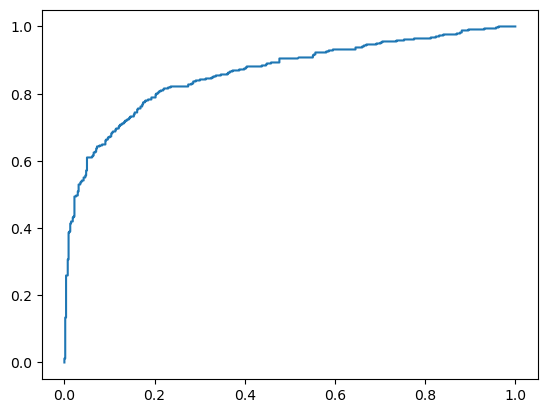

In [93]:
plt.plot(fpr,tpr)
plt.show();

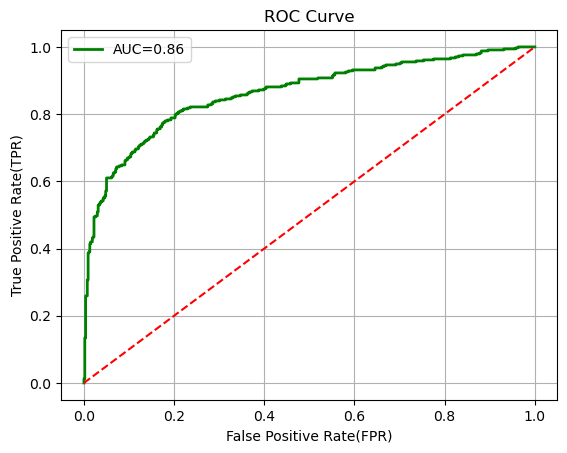

In [94]:
plt.plot(fpr,tpr,color='green',lw=2,label=f'AUC={auc_score:.2}')
plt.plot([0,1],[0,1],linestyle='--',color='red')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show();

In [95]:
# Now we will try to predict the survival for testing data

In [96]:
test_data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\07 Logistic Regression\Titanic_test.csv')

In [97]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [98]:
## drop Name and PassengerId from testing data
test_data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [99]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


In [100]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [101]:
test_median1=test_data['Age'].median()
test_median1

27.0

In [102]:
test_data['Age']=test_data['Age'].fillna(test_median1)

In [103]:
test_median2=test_data['Fare'].median()
test_median2

14.4542

In [104]:
test_data['Fare']=test_data['Fare'].fillna(test_median2)

In [105]:
test_mode=test_data['Cabin'].mode()
test_mode

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [106]:
test_data['Cabin']=test_data['Cabin'].fillna(test_mode[0])

In [107]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [108]:
test_data.duplicated().any()

True

In [109]:
test_data[test_data.duplicated()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,3,male,27.0,2,0,2662,21.6792,B57 B59 B63 B66,C


In [110]:
test_data.drop_duplicates(inplace=True)

In [111]:
test_data.duplicated().any()

False

In [112]:
test_data['Ticket']=ord_enc.fit_transform(test_data[['Ticket']])  ## coverting Ticket column to numerical

In [113]:
test_data['Cabin']=ord_enc.fit_transform(test_data[['Cabin']])  ## coverting Cabin column to numerical

In [114]:
test_data['Embarked']=ord_enc.fit_transform(test_data[['Embarked']])  ## coverting Embarked column to numerical

In [115]:
test_data_new=pd.get_dummies(test_data,dtype='int')  ## coverting Sex column to numerical

In [116]:
test_data_new

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,3,34.5,0,0,152.0,7.8292,15.0,1.0,0,1
1,3,47.0,1,0,221.0,7.0000,15.0,2.0,1,0
2,2,62.0,0,0,73.0,9.6875,15.0,1.0,0,1
3,3,27.0,0,0,147.0,8.6625,15.0,2.0,0,1
4,3,22.0,1,1,138.0,12.2875,15.0,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,267.0,8.0500,15.0,2.0,0,1
414,1,39.0,0,0,324.0,108.9000,22.0,0.0,1,0
415,3,38.5,0,0,346.0,7.2500,15.0,2.0,0,1
416,3,27.0,0,0,220.0,8.0500,15.0,2.0,0,1


In [117]:
test_features=std_sca.fit_transform(test_data_new)
test_features

array([[ 0.87532977,  0.3852975 , -0.49651236, ..., -0.47582797,
        -0.75735388,  0.75735388],
       [ 0.87532977,  1.3693069 ,  0.62265334, ...,  0.69825642,
         1.32038671, -1.32038671],
       [-0.31363607,  2.55011819, -0.49651236, ..., -0.47582797,
        -0.75735388,  0.75735388],
       ...,
       [ 0.87532977,  0.70018051, -0.49651236, ...,  0.69825642,
        -0.75735388,  0.75735388],
       [ 0.87532977, -0.20510815, -0.49651236, ...,  0.69825642,
        -0.75735388,  0.75735388],
       [ 0.87532977, -0.20510815,  0.62265334, ..., -1.64991235,
        -0.75735388,  0.75735388]])

In [118]:
## with this data we can predict target values for testing data given by the model

In [119]:
target_pred=model.predict(test_features)

In [120]:
target_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Significance of feature selection
## using RFE model we can choose important features to be passed to the logistic regression model 

In [123]:
from sklearn.feature_selection import RFE

In [144]:
rfe=RFE(model,n_features_to_select=10)

In [145]:
rfe.fit(features,target)

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [146]:
y_predict=rfe.predict(features)

In [147]:
accuracy_score(target,y_predict)

0.8057142857142857

In [148]:
## we tried using different values of n_features_to_select and found that maximum accuracy of 80.57% is achieved using
## 9 out of 10 features. Below that the accuracy reduces.

## Conclusion

In [149]:
## maximum accuracy obtained by our logistic regression model is 80.57 percent.

# Deployment with Streamlit

In [152]:
features

array([[ 0.83498946, -0.56655874,  0.55410137, ...,  0.58856783,
        -0.73518226,  0.73518226],
       [-1.5526438 ,  0.65552278,  0.55410137, ..., -1.91141687,
         1.36020692, -1.36020692],
       [ 0.83498946, -0.26103836, -0.5021921 , ...,  0.58856783,
         1.36020692, -1.36020692],
       ...,
       [ 0.83498946, -0.10827817,  0.55410137, ...,  0.58856783,
         1.36020692, -1.36020692],
       [-1.5526438 , -0.26103836, -0.5021921 , ..., -1.91141687,
        -0.73518226,  0.73518226],
       [ 0.83498946,  0.19724221, -0.5021921 , ..., -0.66142452,
        -0.73518226,  0.73518226]])

In [153]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [160]:
log_model=LogisticRegression()

In [161]:
log_model.fit(features,target)

LogisticRegression()

In [162]:
pred=log_model.predict(features)

In [163]:
accuracy_score(target,pred)

0.8057142857142857

In [158]:
import pickle

In [159]:
file='log_1.pkl'

In [164]:
pickle.dump(log_model,open(file,'wb'))

In [165]:
## here we have saved our logistic regression model as pickle file. Model deployment process will be done in a separate python notebook